In [ ]:
# Tiny YoloV4 Model

## Mount with your Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Setup darknet environment

In [ ]:
# check whether GPU is provided
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


##Download Dark Net

In [ ]:
import os
assert os.getcwd()=='/content', 'Directory should be "/content" instead of "{}"'.format(os.getcwd())


!git clone https://github.com/encodingintuition/darknet-yolov4_tiny.git
%cd darknet-yolov4_tiny
!make
!chmod +x ./darknet

Cloning into 'darknet-yolov4_tiny'...
remote: Enumerating objects: 1048, done.
remote: Counting objects: 100% (1048/1048), done.
remote: Compressing objects: 100% (836/836), done.
remote: Total 1048 (delta 223), reused 1030 (delta 208), pack-reused 0
Receiving objects: 100% (1048/1048), 43.56 MiB | 35.10 MiB/s, done.
Resolving deltas: 100% (223/223), done.
/content/darknet-yolov4_tiny
mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -fPIC -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunuse

## Dataset upload

In [ ]:
# goes to the drive 

%cd /content/drive/My Drive/
# copies files from drive

%cp -av yolov4/datasets/data-in.zip /content/darknet-yolov4_tiny/
# move to colab folder

%cd /content/darknet-yolov4_tiny
# unizip files

!unzip data-in.zip 
# move files to data folder

%cp -ar /content/darknet-yolov4_tiny/data-in/* /content/darknet-yolov4_tiny/data/

/content/drive/My Drive
'yolov4/datasets/data-in.zip' -> '/content/darknet-yolov4_tiny/data-in.zip'
/content/darknet-yolov4_tiny
Archive:  data-in.zip
   creating: data-in/
  inflating: data-in/.DS_Store       
   creating: __MACOSX/
   creating: __MACOSX/data-in/
  inflating: __MACOSX/data-in/._.DS_Store  
  inflating: data-in/classes.names   
  inflating: __MACOSX/data-in/._classes.names  
   creating: data-in/obj/
  inflating: data-in/obj/.DS_Store   
   creating: __MACOSX/data-in/obj/
  inflating: __MACOSX/data-in/obj/._.DS_Store  
  inflating: data-in/obj/hand_00000.jpg  
  inflating: __MACOSX/data-in/obj/._hand_00000.jpg  
  inflating: data-in/obj/hand_00000.txt  
  inflating: __MACOSX/data-in/obj/._hand_00000.txt  
  inflating: data-in/obj/hand_00001.jpg  
  inflating: __MACOSX/data-in/obj/._hand_00001.jpg  
  inflating: data-in/obj/hand_00001.txt  
  inflating: __MACOSX/data-in/obj/._hand_00001.txt  
  inflating: data-in/obj/hand_00002.jpg  
  inflating: __MACOSX/data-in/obj/._

In [ ]:
#check all is updated

%ls /content/darknet-yolov4_tiny/data/

classes.names  obj/      obj.names  valid.txt
labels/        obj.data  train.txt  yolov4.data


## Visualize custom dataset examples (optional)

In [ ]:
assert os.getcwd()=='/content/darknet-yolov4_tiny', 'Directory should be "/content/darknet-yolov4_tiny" instead of "{}"'.format(os.getcwd())

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import glob

def read_label(image_path):
  file_name = image_path.replace('.jpg', '.txt')
  with open(file_name, 'rt') as file:
    print(os.path.basename(file_name) + ': \n' + file.read())

image_path = glob.glob("data/obj/*.jpg")
fig = plt.figure(figsize=(12,8))
cols = 2
rows = 2
grid = gridspec.GridSpec(nrows=rows, ncols=cols, figure=fig)
for i in range(cols*rows):
  fig.add_subplot(grid[i])
  image=plt.imread(image_path[i])
  plt.title(os.path.basename(image_path[i]))
  plt.axis(False)
  plt.imshow(image)
  read_label(image_path[i])

plt.savefig("dataset_examples.jpg", dpi=300)

## Link to gDrive


In [ ]:
assert os.getcwd()=='/content/darknet-yolov4_tiny', 'Directory should be "/content/darknet-yolov4_tiny" instead of "{}"'.format(os.getcwd())

# delete backup folder from our 
!rm /content/darknet-yolov4_tiny/backup -r

# create Symlinks so we can save trained weight in our Google Drive
# create folder YOLOv4_weight/back in your Drive to store trained weights
!ln -s /content/drive/'My Drive'/yolov4_weight/backup /content/darknet-yolov4_tiny

### Set consel to not disconnect 

In [ ]:
"""

function ConnectButton(){
    console.log("Connect pushed"); 
    document.querySelector("#top-toolbar > colab-connect-button").shadowRoot.querySelector("#connect").click() 
}
setInterval(ConnectButton,60000);


"""


In [ ]:
%ls

3rdparty/                data/                   net_cam_v3.sh*
backup@                  data-in/                obj/
build.ps1*               data-in.zip             README.md
build.sh*                image_yolov2.sh*        results/
cfg/                     image_yolov3.sh*        scripts/
cmake/                   include/                src/
CMakeLists.txt*          json_mjpeg_streams.sh*  uselib*
darknet*                 libdarknet.so*          video_v2.sh*
DarknetConfig.cmake.in*  LICENSE*                video_yolov3.sh*
darknet.py*              __MACOSX/               yolov4-tiny.conv.29
darknet_video.py*        Makefile*               yolov4_tiny_train_best.weights


## Training

In [ ]:
# Checks drive

assert os.getcwd()=='/content/darknet-yolov4_tiny', 'Directory should be "/darknet-yolov4_tiny" instead of "{}"'.format(os.getcwd())

In [ ]:
%%capture
!./darknet detector train data/yolov4.data cfg/yolov4_tiny_train.cfg /content/drive/'My Drive'/yolov4_weight/backup yolov4-tiny.conv.29 -dont_show -map
#If you get CUDA out of memory adjust subdivisions above!
#adjust max batches down for shorter training above

## Visualize training result

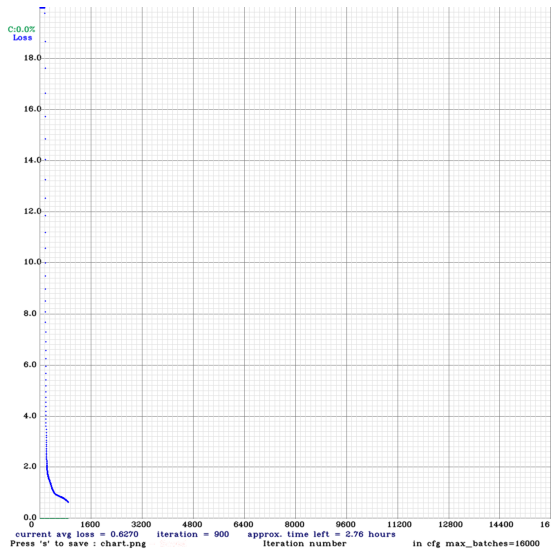

In [ ]:
assert os.getcwd()=='/content/darknet-yolov4_tiny', 'Directory should be "/content/darknet-yolov4_tiny" instead of "{}"'.format(os.getcwd())

# Plotting training result after 2000 epochs
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
train_result = plt.imread("chart.png")
plt.axis(False)
plt.imshow(train_result)

In [ ]:
# show labels of dataset
assert os.getcwd()=='/content/darknet-yolov4_tiny', 'Directory should be "/content/darknet-yolov4_tiny" instead of "{}"'.format(os.getcwd())

!cat data/classes.names

foward
back
left
right
input
plus
three
seven

In [ ]:
# best model training

!./darknet detector map data/yolov4.data cfg/yolov4_tiny_train.cfg /content/drive/'My Drive'/yolov4_weight/backup/yolov4_tiny_train_last.weights

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 4, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 2    416 x 416 x   3 ->  208 x 208 x  32 0.075 BF
   1 conv     64       3 x 3/ 2    208 x 208 x  32 ->  104 x 104 x  64 0.399 BF
   2 conv     64       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.797 BF
   3 route  2 		                       1/2 ->  104 x 104 x  32 
   4 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   5 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   6 route  5 4 	                           ->  104 x 104 x  64 
   7 conv     64       1 x 1/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.089 BF
   8 route  2 7 	                           ->  104 x 104 x 128 
   9 max                2x 2/ 2   

In [ ]:
!./darknet detector map data/yolov4.data cfg/yolov4_tiny_train.cfg /content/drive/'My Drive'/yolov4_weight/backup/yolov4_tiny_train_6000.weights

In [ ]:
# Test

!./darknet detector test data/yolov4.data cfg/yolov4_tiny_train.cfg /content/drive/'My Drive'/yolov4_weight/backup/yolov4_tiny_train_6000.weights data/obj/hand_00000.jpg 



In [ ]:
!pwd

/content/darknet-yolov4_tiny


In [ ]:
%ls data/obj

In [ ]:
!imShow('prediction.jpg')

/bin/bash: -c: line 0: syntax error near unexpected token `'prediction.jpg''
/bin/bash: -c: line 0: `imShow('prediction.jpg')'


In [ ]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3width, 3height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

SyntaxError: ignored